In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
#x data=handwritten image 
#y data=clasification number
mnist=tf.keras.datasets.mnist

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

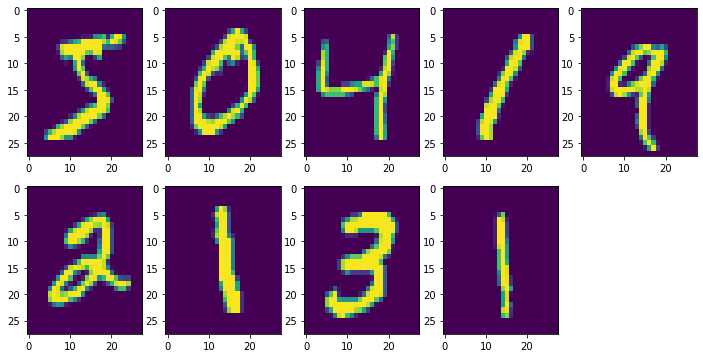

In [5]:
plt.figure(figsize=(12,6))
k=0
for i in range(0,9):
    plt.subplot(250+1+i) 
    plt.imshow(x_train[k].reshape(28,28),aspect='auto')
    k+=1
plt.show()


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [8]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9260
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1041 - accuracy: 0.9680
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0721 - accuracy: 0.9775


In [10]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


In [11]:
loss,accuracy=model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0881 - accuracy: 0.9716
0.08813785016536713
0.9715999960899353


1/1 [==============================] - 0s 84ms/step
output 8


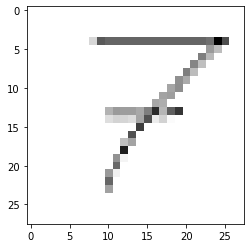

In [12]:
img=1
while os.path.isfile(f"digit/test{img}.png"):
  
        img=cv2.imread(f"digit/test{img}.png")[:,:,0]
        img=np.invert(np.array([img]))
        pred=model.predict(img)
        print(f"output {np.argmax(pred)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
        img +=1
     

In [16]:
pred=model.predict(x_test)


313/313 [==============================] - 0s 1ms/step


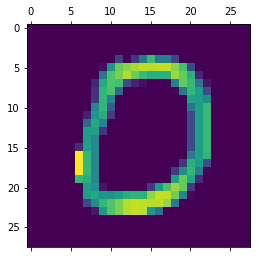

In [20]:
plt.matshow(x_test[10])


In [21]:
np.argmax(pred[10])


0